# Substep is currently set to 500

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import os
import copy

from cascade.cascade import Cascade
datadir = "C:/Users/Lexi/PycharmProjects/CASCADE/cascade/data/outwash_data/"  # input datadir, add the default b3d files here
cascade = Cascade(
    datadir, 
    name="default",  
    elevation_file="barrier3d-default-elevation.npy",  # if using different elevation file, change this before "-elevation.npy"
    dune_file="barrier3d-default-dunes.npy",
    parameter_file="outwash-parameters.yaml",
    storm_file="barrier3d-default-storms.npy",  # same as "StormSeries_1kyrs_VCR_Berm1pt9m_Slope0pt04_01.npy"
    num_cores=1,  # cascade can run in parallel, can never specify more cores than that
    roadway_management_module=False,
    alongshore_transport_module=False,
    beach_nourishment_module=False,
    community_economics_module=False,
    outwash_module=True,
    alongshore_section_count=1,
    time_step_count=26,
    wave_height=1, # ---------- for BRIE and Barrier3D --------------- #
    wave_period=7,
    wave_asymmetry=0.8,
    wave_angle_high_fraction=0.2,
    bay_depth=3.0,
    s_background=0.001,
    berm_elevation=1.9,
    MHW=0.46,
    beta=0.04,
    sea_level_rise_rate=0.004,
    sea_level_rise_constant=True,
    background_erosion=0.0,
    min_dune_growth_rate=0.25,
    max_dune_growth_rate=0.65,
    road_ele=1.7,  # ---------- roadway management --------------- #
    road_width=30,
    road_setback=30,
    dune_design_elevation=3.7,
    dune_minimum_elevation=2.2,
    trigger_dune_knockdown=False,
    group_roadway_abandonment=None,
    nourishment_interval=None, # ---------- beach and dune ("community") management --------------- #
    nourishment_volume=300.0,
    overwash_filter=40,
    overwash_to_dune=10,
    number_of_communities=1, # ---------- coastal real estate markets (in development) --------------- #
    sand_cost=10,
    taxratio_oceanfront=1,
    external_housing_market_value_oceanfront=6e5,
    external_housing_market_value_nonoceanfront=4e5,
    fixed_cost_beach_nourishment=2e6,
    fixed_cost_dune_nourishment=2e5,
    nourishment_cost_subsidy=10e6,
    house_footprint_x=15,
    house_footprint_y=20,
    beach_full_cross_shore=70,
    outwash_storms="outwash_storm25.npy",  # --------- outwasher (in development) ------------ #
    washout_to_shoreface=True,
)

In [2]:
for time_step in range(cascade._nt - 1):
    # Print time step to screen (NOTE: time_index in each model is time_step+1)
    print("\r", "Time Step: ", time_step, end="")
    cascade.update()
    if cascade.b3d_break:
        break

 Time Step:  10

c:\users\lexi\pycharmprojects\barrier3d\barrier3d\barrier3d.py:1501: RuntimeWarning: invalid value encountered in double_scalars
  Qs1 = Qs0 * Q1 / (Q1 + Q2 + Q3)
c:\users\lexi\pycharmprojects\barrier3d\barrier3d\barrier3d.py:1502: RuntimeWarning: invalid value encountered in double_scalars
  Qs2 = Qs0 * Q2 / (Q1 + Q2 + Q3)
c:\users\lexi\pycharmprojects\barrier3d\barrier3d\barrier3d.py:1503: RuntimeWarning: invalid value encountered in double_scalars
  Qs3 = Qs0 * Q3 / (Q1 + Q2 + Q3)


 Outwasher Time Step:  0
 Outwasher Time Step:  1
 Outwasher Time Step:  2
 Outwasher Time Step:  3
 Outwasher Time Step:  4
 Outwasher Time Step:  5
 Outwasher Time Step:  6
 Outwasher Time Step:  7
 Outwasher Time Step:  8
 Outwasher Time Step:  9
 Outwasher Time Step:  10
 Outwasher Time Step:  11
 Outwasher Time Step:  12
 Outwasher Time Step:  13
 Outwasher Time Step:  14
 Outwasher Time Step:  15
 Outwasher Time Step:  16
 Outwasher Time Step:  17
 Outwasher Time Step:  18
 Outwasher Time Step:  19
 Outwasher Time Step:  20
 Outwasher Time Step:  21
 Outwasher Time Step:  22
 Outwasher Time Step:  23
 Outwasher Time Step:  24
 Outwasher Time Step:  25
 Outwasher Time Step:  26
 Outwasher Time Step:  27
 Outwasher Time Step:  28
 Outwasher Time Step:  29
 Outwasher Time Step:  30
 Outwasher Time Step:  31
 Outwasher Time Step:  32
 Outwasher Time Step:  33
 Outwasher Time Step:  34
 Outwasher Time Step:  35
 Outwasher Time Step:  36
 Outwasher Time Step:  37
 Outwasher Time Step: 

 Outwasher Time Step:  309
 Outwasher Time Step:  310
 Outwasher Time Step:  311
 Outwasher Time Step:  312
 Outwasher Time Step:  313
 Outwasher Time Step:  314
 Outwasher Time Step:  315
 Outwasher Time Step:  316
 Outwasher Time Step:  317
 Outwasher Time Step:  318
 Outwasher Time Step:  319
 Outwasher Time Step:  320
 Outwasher Time Step:  321
 Outwasher Time Step:  322
 Outwasher Time Step:  323
 Outwasher Time Step:  324
 Outwasher Time Step:  325
 Outwasher Time Step:  326
 Outwasher Time Step:  327
 Outwasher Time Step:  328
 Outwasher Time Step:  329
 Outwasher Time Step:  330
 Outwasher Time Step:  331
 Outwasher Time Step:  332
 Outwasher Time Step:  333
 Outwasher Time Step:  334
 Outwasher Time Step:  335
 Outwasher Time Step:  336
 Outwasher Time Step:  337
 Outwasher Time Step:  338
 Outwasher Time Step:  339
 Outwasher Time Step:  340
 Outwasher Time Step:  341
 Outwasher Time Step:  342
 Outwasher Time Step:  343
 Outwasher Time Step:  344
 Outwasher Time Step:  345
 

 Outwasher Time Step:  613
 Outwasher Time Step:  614
 Outwasher Time Step:  615
 Outwasher Time Step:  616
 Outwasher Time Step:  617
 Outwasher Time Step:  618
 Outwasher Time Step:  619
 Outwasher Time Step:  620
 Outwasher Time Step:  621
 Outwasher Time Step:  622
 Outwasher Time Step:  623
 Outwasher Time Step:  624
 Outwasher Time Step:  625
 Outwasher Time Step:  626
 Outwasher Time Step:  627
 Outwasher Time Step:  628
 Outwasher Time Step:  629
 Outwasher Time Step:  630
 Outwasher Time Step:  631
 Outwasher Time Step:  632
 Outwasher Time Step:  633
 Outwasher Time Step:  634
 Outwasher Time Step:  635
 Outwasher Time Step:  636
 Outwasher Time Step:  637
 Outwasher Time Step:  638
 Outwasher Time Step:  639
 Outwasher Time Step:  640
 Outwasher Time Step:  641
 Outwasher Time Step:  642
 Outwasher Time Step:  643
 Outwasher Time Step:  644
 Outwasher Time Step:  645
 Outwasher Time Step:  646
 Outwasher Time Step:  647
 Outwasher Time Step:  648
 Outwasher Time Step:  649
 

 Outwasher Time Step:  918
 Outwasher Time Step:  919
 Outwasher Time Step:  920
 Outwasher Time Step:  921
 Outwasher Time Step:  922
 Outwasher Time Step:  923
 Outwasher Time Step:  924
 Outwasher Time Step:  925
 Outwasher Time Step:  926
 Outwasher Time Step:  927
 Outwasher Time Step:  928
 Outwasher Time Step:  929
 Outwasher Time Step:  930
 Outwasher Time Step:  931
 Outwasher Time Step:  932
 Outwasher Time Step:  933
 Outwasher Time Step:  934
 Outwasher Time Step:  935
 Outwasher Time Step:  936
 Outwasher Time Step:  937
 Outwasher Time Step:  938
 Outwasher Time Step:  939
 Outwasher Time Step:  940
 Outwasher Time Step:  941
 Outwasher Time Step:  942
 Outwasher Time Step:  943
 Outwasher Time Step:  944
 Outwasher Time Step:  945
 Outwasher Time Step:  946
 Outwasher Time Step:  947
 Outwasher Time Step:  948
 Outwasher Time Step:  949
 Outwasher Time Step:  950
 Outwasher Time Step:  951
 Outwasher Time Step:  952
 Outwasher Time Step:  953
 Outwasher Time Step:  954
 

 Outwasher Time Step:  1214
 Outwasher Time Step:  1215
 Outwasher Time Step:  1216
 Outwasher Time Step:  1217
 Outwasher Time Step:  1218
 Outwasher Time Step:  1219
 Outwasher Time Step:  1220
 Outwasher Time Step:  1221
 Outwasher Time Step:  1222
 Outwasher Time Step:  1223
 Outwasher Time Step:  1224
 Outwasher Time Step:  1225
 Outwasher Time Step:  1226
 Outwasher Time Step:  1227
 Outwasher Time Step:  1228
 Outwasher Time Step:  1229
 Outwasher Time Step:  1230
 Outwasher Time Step:  1231
 Outwasher Time Step:  1232
 Outwasher Time Step:  1233
 Outwasher Time Step:  1234
 Outwasher Time Step:  1235
 Outwasher Time Step:  1236
 Outwasher Time Step:  1237
 Outwasher Time Step:  1238
 Outwasher Time Step:  1239
 Outwasher Time Step:  1240
 Outwasher Time Step:  1241
 Outwasher Time Step:  1242
 Outwasher Time Step:  1243
 Outwasher Time Step:  1244
 Outwasher Time Step:  1245
 Outwasher Time Step:  1246
 Outwasher Time Step:  1247
 Outwasher Time Step:  1248
 Outwasher Time Step

 Outwasher Time Step:  1507
 Outwasher Time Step:  1508
 Outwasher Time Step:  1509
 Outwasher Time Step:  1510
 Outwasher Time Step:  1511
 Outwasher Time Step:  1512
 Outwasher Time Step:  1513
 Outwasher Time Step:  1514
 Outwasher Time Step:  1515
 Outwasher Time Step:  1516
 Outwasher Time Step:  1517
 Outwasher Time Step:  1518
 Outwasher Time Step:  1519
 Outwasher Time Step:  1520
 Outwasher Time Step:  1521
 Outwasher Time Step:  1522
 Outwasher Time Step:  1523
 Outwasher Time Step:  1524
 Outwasher Time Step:  1525
 Outwasher Time Step:  1526
 Outwasher Time Step:  1527
 Outwasher Time Step:  1528
 Outwasher Time Step:  1529
 Outwasher Time Step:  1530
 Outwasher Time Step:  1531
 Outwasher Time Step:  1532
 Outwasher Time Step:  1533
 Outwasher Time Step:  1534
 Outwasher Time Step:  1535
 Outwasher Time Step:  1536
 Outwasher Time Step:  1537
 Outwasher Time Step:  1538
 Outwasher Time Step:  1539
 Outwasher Time Step:  1540
 Outwasher Time Step:  1541
 Outwasher Time Step

 Outwasher Time Step:  1800
 Outwasher Time Step:  1801
 Outwasher Time Step:  1802
 Outwasher Time Step:  1803
 Outwasher Time Step:  1804
 Outwasher Time Step:  1805
 Outwasher Time Step:  1806
 Outwasher Time Step:  1807
 Outwasher Time Step:  1808
 Outwasher Time Step:  1809
 Outwasher Time Step:  1810
 Outwasher Time Step:  1811
 Outwasher Time Step:  1812
 Outwasher Time Step:  1813
 Outwasher Time Step:  1814
 Outwasher Time Step:  1815
 Outwasher Time Step:  1816
 Outwasher Time Step:  1817
 Outwasher Time Step:  1818
 Outwasher Time Step:  1819
 Outwasher Time Step:  1820
 Outwasher Time Step:  1821
 Outwasher Time Step:  1822
 Outwasher Time Step:  1823
 Outwasher Time Step:  1824
 Outwasher Time Step:  1825
 Outwasher Time Step:  1826
 Outwasher Time Step:  1827
 Outwasher Time Step:  1828
 Outwasher Time Step:  1829
 Outwasher Time Step:  1830
 Outwasher Time Step:  1831
 Outwasher Time Step:  1832
 Outwasher Time Step:  1833
 Outwasher Time Step:  1834
 Outwasher Time Step

 Outwasher Time Step:  2093
 Outwasher Time Step:  2094
 Outwasher Time Step:  2095
 Outwasher Time Step:  2096
 Outwasher Time Step:  2097
 Outwasher Time Step:  2098
 Outwasher Time Step:  2099
 Outwasher Time Step:  2100
 Outwasher Time Step:  2101
 Outwasher Time Step:  2102
 Outwasher Time Step:  2103
 Outwasher Time Step:  2104
 Outwasher Time Step:  2105
 Outwasher Time Step:  2106
 Outwasher Time Step:  2107
 Outwasher Time Step:  2108
 Outwasher Time Step:  2109
 Outwasher Time Step:  2110
 Outwasher Time Step:  2111
 Outwasher Time Step:  2112
 Outwasher Time Step:  2113
 Outwasher Time Step:  2114
 Outwasher Time Step:  2115
 Outwasher Time Step:  2116
 Outwasher Time Step:  2117
 Outwasher Time Step:  2118
 Outwasher Time Step:  2119
 Outwasher Time Step:  2120
 Outwasher Time Step:  2121
 Outwasher Time Step:  2122
 Outwasher Time Step:  2123
 Outwasher Time Step:  2124
 Outwasher Time Step:  2125
 Outwasher Time Step:  2126
 Outwasher Time Step:  2127
 Outwasher Time Step

 Outwasher Time Step:  2387
 Outwasher Time Step:  2388
 Outwasher Time Step:  2389
 Outwasher Time Step:  2390
 Outwasher Time Step:  2391
 Outwasher Time Step:  2392
 Outwasher Time Step:  2393
 Outwasher Time Step:  2394
 Outwasher Time Step:  2395
 Outwasher Time Step:  2396
 Outwasher Time Step:  2397
 Outwasher Time Step:  2398
 Outwasher Time Step:  2399
 Outwasher Time Step:  2400
 Outwasher Time Step:  2401
 Outwasher Time Step:  2402
 Outwasher Time Step:  2403
 Outwasher Time Step:  2404
 Outwasher Time Step:  2405
 Outwasher Time Step:  2406
 Outwasher Time Step:  2407
 Outwasher Time Step:  2408
 Outwasher Time Step:  2409
 Outwasher Time Step:  2410
 Outwasher Time Step:  2411
 Outwasher Time Step:  2412
 Outwasher Time Step:  2413
 Outwasher Time Step:  2414
 Outwasher Time Step:  2415
 Outwasher Time Step:  2416
 Outwasher Time Step:  2417
 Outwasher Time Step:  2418
 Outwasher Time Step:  2419
 Outwasher Time Step:  2420
 Outwasher Time Step:  2421
 Outwasher Time Step

 Outwasher Time Step:  2680
 Outwasher Time Step:  2681
 Outwasher Time Step:  2682
 Outwasher Time Step:  2683
 Outwasher Time Step:  2684
 Outwasher Time Step:  2685
 Outwasher Time Step:  2686
 Outwasher Time Step:  2687
 Outwasher Time Step:  2688
 Outwasher Time Step:  2689
 Outwasher Time Step:  2690
 Outwasher Time Step:  2691
 Outwasher Time Step:  2692
 Outwasher Time Step:  2693
 Outwasher Time Step:  2694
 Outwasher Time Step:  2695
 Outwasher Time Step:  2696
 Outwasher Time Step:  2697
 Outwasher Time Step:  2698
 Outwasher Time Step:  2699
 Outwasher Time Step:  2700
 Outwasher Time Step:  2701
 Outwasher Time Step:  2702
 Outwasher Time Step:  2703
 Outwasher Time Step:  2704
 Outwasher Time Step:  2705
 Outwasher Time Step:  2706
 Outwasher Time Step:  2707
 Outwasher Time Step:  2708
 Outwasher Time Step:  2709
 Outwasher Time Step:  2710
 Outwasher Time Step:  2711
 Outwasher Time Step:  2712
 Outwasher Time Step:  2713
 Outwasher Time Step:  2714
 Outwasher Time Step

 Outwasher Time Step:  2973
 Outwasher Time Step:  2974
 Outwasher Time Step:  2975
 Outwasher Time Step:  2976
 Outwasher Time Step:  2977
 Outwasher Time Step:  2978
 Outwasher Time Step:  2979
 Outwasher Time Step:  2980
 Outwasher Time Step:  2981
 Outwasher Time Step:  2982
 Outwasher Time Step:  2983
 Outwasher Time Step:  2984
 Outwasher Time Step:  2985
 Outwasher Time Step:  2986
 Outwasher Time Step:  2987
 Outwasher Time Step:  2988
 Outwasher Time Step:  2989
 Outwasher Time Step:  2990
 Outwasher Time Step:  2991
 Outwasher Time Step:  2992
 Outwasher Time Step:  2993
 Outwasher Time Step:  2994
 Outwasher Time Step:  2995
 Outwasher Time Step:  2996
 Outwasher Time Step:  2997
 Outwasher Time Step:  2998
 Outwasher Time Step:  2999
 Outwasher Time Step:  3000
 Outwasher Time Step:  3001
 Outwasher Time Step:  3002
 Outwasher Time Step:  3003
 Outwasher Time Step:  3004
 Outwasher Time Step:  3005
 Outwasher Time Step:  3006
 Outwasher Time Step:  3007
 Outwasher Time Step

 Outwasher Time Step:  3266
 Outwasher Time Step:  3267
 Outwasher Time Step:  3268
 Outwasher Time Step:  3269
 Outwasher Time Step:  3270
 Outwasher Time Step:  3271
 Outwasher Time Step:  3272
 Outwasher Time Step:  3273
 Outwasher Time Step:  3274
 Outwasher Time Step:  3275
 Outwasher Time Step:  3276
 Outwasher Time Step:  3277
 Outwasher Time Step:  3278
 Outwasher Time Step:  3279
 Outwasher Time Step:  3280
 Outwasher Time Step:  3281
 Outwasher Time Step:  3282
 Outwasher Time Step:  3283
 Outwasher Time Step:  3284
 Outwasher Time Step:  3285
 Outwasher Time Step:  3286
 Outwasher Time Step:  3287
 Outwasher Time Step:  3288
 Outwasher Time Step:  3289
 Outwasher Time Step:  3290
 Outwasher Time Step:  3291
 Outwasher Time Step:  3292
 Outwasher Time Step:  3293
 Outwasher Time Step:  3294
 Outwasher Time Step:  3295
 Outwasher Time Step:  3296
 Outwasher Time Step:  3297
 Outwasher Time Step:  3298
 Outwasher Time Step:  3299
 Outwasher Time Step:  3300
 Outwasher Time Step

 Outwasher Time Step:  3560
 Outwasher Time Step:  3561
 Outwasher Time Step:  3562
 Outwasher Time Step:  3563
 Outwasher Time Step:  3564
 Outwasher Time Step:  3565
 Outwasher Time Step:  3566
 Outwasher Time Step:  3567
 Outwasher Time Step:  3568
 Outwasher Time Step:  3569
 Outwasher Time Step:  3570
 Outwasher Time Step:  3571
 Outwasher Time Step:  3572
 Outwasher Time Step:  3573
 Outwasher Time Step:  3574
 Outwasher Time Step:  3575
 Outwasher Time Step:  3576
 Outwasher Time Step:  3577
 Outwasher Time Step:  3578
 Outwasher Time Step:  3579
 Outwasher Time Step:  3580
 Outwasher Time Step:  3581
 Outwasher Time Step:  3582
 Outwasher Time Step:  3583
 Outwasher Time Step:  3584
 Outwasher Time Step:  3585
 Outwasher Time Step:  3586
 Outwasher Time Step:  3587
 Outwasher Time Step:  3588
 Outwasher Time Step:  3589
 Outwasher Time Step:  3590
 Outwasher Time Step:  3591
 Outwasher Time Step:  3592
 Outwasher Time Step:  3593
 Outwasher Time Step:  3594
 Outwasher Time Step

 Outwasher Time Step:  3854
 Outwasher Time Step:  3855
 Outwasher Time Step:  3856
 Outwasher Time Step:  3857
 Outwasher Time Step:  3858
 Outwasher Time Step:  3859
 Outwasher Time Step:  3860
 Outwasher Time Step:  3861
 Outwasher Time Step:  3862
 Outwasher Time Step:  3863
 Outwasher Time Step:  3864
 Outwasher Time Step:  3865
 Outwasher Time Step:  3866
 Outwasher Time Step:  3867
 Outwasher Time Step:  3868
 Outwasher Time Step:  3869
 Outwasher Time Step:  3870
 Outwasher Time Step:  3871
 Outwasher Time Step:  3872
 Outwasher Time Step:  3873
 Outwasher Time Step:  3874
 Outwasher Time Step:  3875
 Outwasher Time Step:  3876
 Outwasher Time Step:  3877
 Outwasher Time Step:  3878
 Outwasher Time Step:  3879
 Outwasher Time Step:  3880
 Outwasher Time Step:  3881
 Outwasher Time Step:  3882
 Outwasher Time Step:  3883
 Outwasher Time Step:  3884
 Outwasher Time Step:  3885
 Outwasher Time Step:  3886
 Outwasher Time Step:  3887
 Outwasher Time Step:  3888
 Outwasher Time Step

 Outwasher Time Step:  4148
 Outwasher Time Step:  4149
 Outwasher Time Step:  4150
 Outwasher Time Step:  4151
 Outwasher Time Step:  4152
 Outwasher Time Step:  4153
 Outwasher Time Step:  4154
 Outwasher Time Step:  4155
 Outwasher Time Step:  4156
 Outwasher Time Step:  4157
 Outwasher Time Step:  4158
 Outwasher Time Step:  4159
 Outwasher Time Step:  4160
 Outwasher Time Step:  4161
 Outwasher Time Step:  4162
 Outwasher Time Step:  4163
 Outwasher Time Step:  4164
 Outwasher Time Step:  4165
 Outwasher Time Step:  4166
 Outwasher Time Step:  4167
 Outwasher Time Step:  4168
 Outwasher Time Step:  4169
 Outwasher Time Step:  4170
 Outwasher Time Step:  4171
 Outwasher Time Step:  4172
 Outwasher Time Step:  4173
 Outwasher Time Step:  4174
 Outwasher Time Step:  4175
 Outwasher Time Step:  4176
 Outwasher Time Step:  4177
 Outwasher Time Step:  4178
 Outwasher Time Step:  4179
 Outwasher Time Step:  4180
 Outwasher Time Step:  4181
 Outwasher Time Step:  4182
 Outwasher Time Step

 Outwasher Time Step:  4442
 Outwasher Time Step:  4443
 Outwasher Time Step:  4444
 Outwasher Time Step:  4445
 Outwasher Time Step:  4446
 Outwasher Time Step:  4447
 Outwasher Time Step:  4448
 Outwasher Time Step:  4449
 Outwasher Time Step:  4450
 Outwasher Time Step:  4451
 Outwasher Time Step:  4452
 Outwasher Time Step:  4453
 Outwasher Time Step:  4454
 Outwasher Time Step:  4455
 Outwasher Time Step:  4456
 Outwasher Time Step:  4457
 Outwasher Time Step:  4458
 Outwasher Time Step:  4459
 Outwasher Time Step:  4460
 Outwasher Time Step:  4461
 Outwasher Time Step:  4462
 Outwasher Time Step:  4463
 Outwasher Time Step:  4464
 Outwasher Time Step:  4465
 Outwasher Time Step:  4466
 Outwasher Time Step:  4467
 Outwasher Time Step:  4468
 Outwasher Time Step:  4469
 Outwasher Time Step:  4470
 Outwasher Time Step:  4471
 Outwasher Time Step:  4472
 Outwasher Time Step:  4473
 Outwasher Time Step:  4474
 Outwasher Time Step:  4475
 Outwasher Time Step:  4476
 Outwasher Time Step

 Outwasher Time Step:  4736
 Outwasher Time Step:  4737
 Outwasher Time Step:  4738
 Outwasher Time Step:  4739
 Outwasher Time Step:  4740
 Outwasher Time Step:  4741
 Outwasher Time Step:  4742
 Outwasher Time Step:  4743
 Outwasher Time Step:  4744
 Outwasher Time Step:  4745
 Outwasher Time Step:  4746
 Outwasher Time Step:  4747
 Outwasher Time Step:  4748
 Outwasher Time Step:  4749
 Outwasher Time Step:  4750
 Outwasher Time Step:  4751
 Outwasher Time Step:  4752
 Outwasher Time Step:  4753
 Outwasher Time Step:  4754
 Outwasher Time Step:  4755
 Outwasher Time Step:  4756
 Outwasher Time Step:  4757
 Outwasher Time Step:  4758
 Outwasher Time Step:  4759
 Outwasher Time Step:  4760
 Outwasher Time Step:  4761
 Outwasher Time Step:  4762
 Outwasher Time Step:  4763
 Outwasher Time Step:  4764
 Outwasher Time Step:  4765
 Outwasher Time Step:  4766
 Outwasher Time Step:  4767
 Outwasher Time Step:  4768
 Outwasher Time Step:  4769
 Outwasher Time Step:  4770
 Outwasher Time Step

 Outwasher Time Step:  5030
 Outwasher Time Step:  5031
 Outwasher Time Step:  5032
 Outwasher Time Step:  5033
 Outwasher Time Step:  5034
 Outwasher Time Step:  5035
 Outwasher Time Step:  5036
 Outwasher Time Step:  5037
 Outwasher Time Step:  5038
 Outwasher Time Step:  5039
 Outwasher Time Step:  5040
 Outwasher Time Step:  5041
 Outwasher Time Step:  5042
 Outwasher Time Step:  5043
 Outwasher Time Step:  5044
 Outwasher Time Step:  5045
 Outwasher Time Step:  5046
 Outwasher Time Step:  5047
 Outwasher Time Step:  5048
 Outwasher Time Step:  5049
 Outwasher Time Step:  5050
 Outwasher Time Step:  5051
 Outwasher Time Step:  5052
 Outwasher Time Step:  5053
 Outwasher Time Step:  5054
 Outwasher Time Step:  5055
 Outwasher Time Step:  5056
 Outwasher Time Step:  5057
 Outwasher Time Step:  5058
 Outwasher Time Step:  5059
 Outwasher Time Step:  5060
 Outwasher Time Step:  5061
 Outwasher Time Step:  5062
 Outwasher Time Step:  5063
 Outwasher Time Step:  5064
 Outwasher Time Step

 Outwasher Time Step:  5324
 Outwasher Time Step:  5325
 Outwasher Time Step:  5326
 Outwasher Time Step:  5327
 Outwasher Time Step:  5328
 Outwasher Time Step:  5329
 Outwasher Time Step:  5330
 Outwasher Time Step:  5331
 Outwasher Time Step:  5332
 Outwasher Time Step:  5333
 Outwasher Time Step:  5334
 Outwasher Time Step:  5335
 Outwasher Time Step:  5336
 Outwasher Time Step:  5337
 Outwasher Time Step:  5338
 Outwasher Time Step:  5339
 Outwasher Time Step:  5340
 Outwasher Time Step:  5341
 Outwasher Time Step:  5342
 Outwasher Time Step:  5343
 Outwasher Time Step:  5344
 Outwasher Time Step:  5345
 Outwasher Time Step:  5346
 Outwasher Time Step:  5347
 Outwasher Time Step:  5348
 Outwasher Time Step:  5349
 Outwasher Time Step:  5350
 Outwasher Time Step:  5351
 Outwasher Time Step:  5352
 Outwasher Time Step:  5353
 Outwasher Time Step:  5354
 Outwasher Time Step:  5355
 Outwasher Time Step:  5356
 Outwasher Time Step:  5357
 Outwasher Time Step:  5358
 Outwasher Time Step

 Outwasher Time Step:  5618
 Outwasher Time Step:  5619
 Outwasher Time Step:  5620
 Outwasher Time Step:  5621
 Outwasher Time Step:  5622
 Outwasher Time Step:  5623
 Outwasher Time Step:  5624
 Outwasher Time Step:  5625
 Outwasher Time Step:  5626
 Outwasher Time Step:  5627
 Outwasher Time Step:  5628
 Outwasher Time Step:  5629
 Outwasher Time Step:  5630
 Outwasher Time Step:  5631
 Outwasher Time Step:  5632
 Outwasher Time Step:  5633
 Outwasher Time Step:  5634
 Outwasher Time Step:  5635
 Outwasher Time Step:  5636
 Outwasher Time Step:  5637
 Outwasher Time Step:  5638
 Outwasher Time Step:  5639
 Outwasher Time Step:  5640
 Outwasher Time Step:  5641
 Outwasher Time Step:  5642
 Outwasher Time Step:  5643
 Outwasher Time Step:  5644
 Outwasher Time Step:  5645
 Outwasher Time Step:  5646
 Outwasher Time Step:  5647
 Outwasher Time Step:  5648
 Outwasher Time Step:  5649
 Outwasher Time Step:  5650
 Outwasher Time Step:  5651
 Outwasher Time Step:  5652
 Outwasher Time Step

 Outwasher Time Step:  5912
 Outwasher Time Step:  5913
 Outwasher Time Step:  5914
 Outwasher Time Step:  5915
 Outwasher Time Step:  5916
 Outwasher Time Step:  5917
 Outwasher Time Step:  5918
 Outwasher Time Step:  5919
 Outwasher Time Step:  5920
 Outwasher Time Step:  5921
 Outwasher Time Step:  5922
 Outwasher Time Step:  5923
 Outwasher Time Step:  5924
 Outwasher Time Step:  5925
 Outwasher Time Step:  5926
 Outwasher Time Step:  5927
 Outwasher Time Step:  5928
 Outwasher Time Step:  5929
 Outwasher Time Step:  5930
 Outwasher Time Step:  5931
 Outwasher Time Step:  5932
 Outwasher Time Step:  5933
 Outwasher Time Step:  5934
 Outwasher Time Step:  5935
 Outwasher Time Step:  5936
 Outwasher Time Step:  5937
 Outwasher Time Step:  5938
 Outwasher Time Step:  5939
 Outwasher Time Step:  5940
 Outwasher Time Step:  5941
 Outwasher Time Step:  5942
 Outwasher Time Step:  5943
 Outwasher Time Step:  5944
 Outwasher Time Step:  5945
 Outwasher Time Step:  5946
 Outwasher Time Step

 Outwasher Time Step:  6206
 Outwasher Time Step:  6207
 Outwasher Time Step:  6208
 Outwasher Time Step:  6209
 Outwasher Time Step:  6210
 Outwasher Time Step:  6211
 Outwasher Time Step:  6212
 Outwasher Time Step:  6213
 Outwasher Time Step:  6214
 Outwasher Time Step:  6215
 Outwasher Time Step:  6216
 Outwasher Time Step:  6217
 Outwasher Time Step:  6218
 Outwasher Time Step:  6219
 Outwasher Time Step:  6220
 Outwasher Time Step:  6221
 Outwasher Time Step:  6222
 Outwasher Time Step:  6223
 Outwasher Time Step:  6224
 Outwasher Time Step:  6225
 Outwasher Time Step:  6226
 Outwasher Time Step:  6227
 Outwasher Time Step:  6228
 Outwasher Time Step:  6229
 Outwasher Time Step:  6230
 Outwasher Time Step:  6231
 Outwasher Time Step:  6232
 Outwasher Time Step:  6233
 Outwasher Time Step:  6234
 Outwasher Time Step:  6235
 Outwasher Time Step:  6236
 Outwasher Time Step:  6237
 Outwasher Time Step:  6238
 Outwasher Time Step:  6239
 Outwasher Time Step:  6240
 Outwasher Time Step

 Outwasher Time Step:  6500
 Outwasher Time Step:  6501
 Outwasher Time Step:  6502
 Outwasher Time Step:  6503
 Outwasher Time Step:  6504
 Outwasher Time Step:  6505
 Outwasher Time Step:  6506
 Outwasher Time Step:  6507
 Outwasher Time Step:  6508
 Outwasher Time Step:  6509
 Outwasher Time Step:  6510
 Outwasher Time Step:  6511
 Outwasher Time Step:  6512
 Outwasher Time Step:  6513
 Outwasher Time Step:  6514
 Outwasher Time Step:  6515
 Outwasher Time Step:  6516
 Outwasher Time Step:  6517
 Outwasher Time Step:  6518
 Outwasher Time Step:  6519
 Outwasher Time Step:  6520
 Outwasher Time Step:  6521
 Outwasher Time Step:  6522
 Outwasher Time Step:  6523
 Outwasher Time Step:  6524
 Outwasher Time Step:  6525
 Outwasher Time Step:  6526
 Outwasher Time Step:  6527
 Outwasher Time Step:  6528
 Outwasher Time Step:  6529
 Outwasher Time Step:  6530
 Outwasher Time Step:  6531
 Outwasher Time Step:  6532
 Outwasher Time Step:  6533
 Outwasher Time Step:  6534
 Outwasher Time Step

 Outwasher Time Step:  6793
 Outwasher Time Step:  6794
 Outwasher Time Step:  6795
 Outwasher Time Step:  6796
 Outwasher Time Step:  6797
 Outwasher Time Step:  6798
 Outwasher Time Step:  6799
 Outwasher Time Step:  6800
 Outwasher Time Step:  6801
 Outwasher Time Step:  6802
 Outwasher Time Step:  6803
 Outwasher Time Step:  6804
 Outwasher Time Step:  6805
 Outwasher Time Step:  6806
 Outwasher Time Step:  6807
 Outwasher Time Step:  6808
 Outwasher Time Step:  6809
 Outwasher Time Step:  6810
 Outwasher Time Step:  6811
 Outwasher Time Step:  6812
 Outwasher Time Step:  6813
 Outwasher Time Step:  6814
 Outwasher Time Step:  6815
 Outwasher Time Step:  6816
 Outwasher Time Step:  6817
 Outwasher Time Step:  6818
 Outwasher Time Step:  6819
 Outwasher Time Step:  6820
 Outwasher Time Step:  6821
 Outwasher Time Step:  6822
 Outwasher Time Step:  6823
 Outwasher Time Step:  6824
 Outwasher Time Step:  6825
 Outwasher Time Step:  6826
 Outwasher Time Step:  6827
 Outwasher Time Step

 Outwasher Time Step:  7087
 Outwasher Time Step:  7088
 Outwasher Time Step:  7089
 Outwasher Time Step:  7090
 Outwasher Time Step:  7091
 Outwasher Time Step:  7092
 Outwasher Time Step:  7093
 Outwasher Time Step:  7094
 Outwasher Time Step:  7095
 Outwasher Time Step:  7096
 Outwasher Time Step:  7097
 Outwasher Time Step:  7098
 Outwasher Time Step:  7099
 Outwasher Time Step:  7100
 Outwasher Time Step:  7101
 Outwasher Time Step:  7102
 Outwasher Time Step:  7103
 Outwasher Time Step:  7104
 Outwasher Time Step:  7105
 Outwasher Time Step:  7106
 Outwasher Time Step:  7107
 Outwasher Time Step:  7108
 Outwasher Time Step:  7109
 Outwasher Time Step:  7110
 Outwasher Time Step:  7111
 Outwasher Time Step:  7112
 Outwasher Time Step:  7113
 Outwasher Time Step:  7114
 Outwasher Time Step:  7115
 Outwasher Time Step:  7116
 Outwasher Time Step:  7117
 Outwasher Time Step:  7118
 Outwasher Time Step:  7119
 Outwasher Time Step:  7120
 Outwasher Time Step:  7121
 Outwasher Time Step

 Outwasher Time Step:  7381
 Outwasher Time Step:  7382
 Outwasher Time Step:  7383
 Outwasher Time Step:  7384
 Outwasher Time Step:  7385
 Outwasher Time Step:  7386
 Outwasher Time Step:  7387
 Outwasher Time Step:  7388
 Outwasher Time Step:  7389
 Outwasher Time Step:  7390
 Outwasher Time Step:  7391
 Outwasher Time Step:  7392
 Outwasher Time Step:  7393
 Outwasher Time Step:  7394
 Outwasher Time Step:  7395
 Outwasher Time Step:  7396
 Outwasher Time Step:  7397
 Outwasher Time Step:  7398
 Outwasher Time Step:  7399
 Outwasher Time Step:  7400
 Outwasher Time Step:  7401
 Outwasher Time Step:  7402
 Outwasher Time Step:  7403
 Outwasher Time Step:  7404
 Outwasher Time Step:  7405
 Outwasher Time Step:  7406
 Outwasher Time Step:  7407
 Outwasher Time Step:  7408
 Outwasher Time Step:  7409
 Outwasher Time Step:  7410
 Outwasher Time Step:  7411
 Outwasher Time Step:  7412
 Outwasher Time Step:  7413
 Outwasher Time Step:  7414
 Outwasher Time Step:  7415
 Outwasher Time Step

 Outwasher Time Step:  7675
 Outwasher Time Step:  7676
 Outwasher Time Step:  7677
 Outwasher Time Step:  7678
 Outwasher Time Step:  7679
 Outwasher Time Step:  7680
 Outwasher Time Step:  7681
 Outwasher Time Step:  7682
 Outwasher Time Step:  7683
 Outwasher Time Step:  7684
 Outwasher Time Step:  7685
 Outwasher Time Step:  7686
 Outwasher Time Step:  7687
 Outwasher Time Step:  7688
 Outwasher Time Step:  7689
 Outwasher Time Step:  7690
 Outwasher Time Step:  7691
 Outwasher Time Step:  7692
 Outwasher Time Step:  7693
 Outwasher Time Step:  7694
 Outwasher Time Step:  7695
 Outwasher Time Step:  7696
 Outwasher Time Step:  7697
 Outwasher Time Step:  7698
 Outwasher Time Step:  7699
 Outwasher Time Step:  7700
 Outwasher Time Step:  7701
 Outwasher Time Step:  7702
 Outwasher Time Step:  7703
 Outwasher Time Step:  7704
 Outwasher Time Step:  7705
 Outwasher Time Step:  7706
 Outwasher Time Step:  7707
 Outwasher Time Step:  7708
 Outwasher Time Step:  7709
 Outwasher Time Step

 Outwasher Time Step:  7968
 Outwasher Time Step:  7969
 Outwasher Time Step:  7970
 Outwasher Time Step:  7971
 Outwasher Time Step:  7972
 Outwasher Time Step:  7973
 Outwasher Time Step:  7974
 Outwasher Time Step:  7975
 Outwasher Time Step:  7976
 Outwasher Time Step:  7977
 Outwasher Time Step:  7978
 Outwasher Time Step:  7979
 Outwasher Time Step:  7980
 Outwasher Time Step:  7981
 Outwasher Time Step:  7982
 Outwasher Time Step:  7983
 Outwasher Time Step:  7984
 Outwasher Time Step:  7985
 Outwasher Time Step:  7986
 Outwasher Time Step:  7987
 Outwasher Time Step:  7988
 Outwasher Time Step:  7989
 Outwasher Time Step:  7990
 Outwasher Time Step:  7991
 Outwasher Time Step:  7992
 Outwasher Time Step:  7993
 Outwasher Time Step:  7994
 Outwasher Time Step:  7995
 Outwasher Time Step:  7996
 Outwasher Time Step:  7997
 Outwasher Time Step:  7998
 Outwasher Time Step:  7999
 Outwasher Time Step:  8000
 Outwasher Time Step:  8001
 Outwasher Time Step:  8002
 Outwasher Time Step

 Outwasher Time Step:  8262
 Outwasher Time Step:  8263
 Outwasher Time Step:  8264
 Outwasher Time Step:  8265
 Outwasher Time Step:  8266
 Outwasher Time Step:  8267
 Outwasher Time Step:  8268
 Outwasher Time Step:  8269
 Outwasher Time Step:  8270
 Outwasher Time Step:  8271
 Outwasher Time Step:  8272
 Outwasher Time Step:  8273
 Outwasher Time Step:  8274
 Outwasher Time Step:  8275
 Outwasher Time Step:  8276
 Outwasher Time Step:  8277
 Outwasher Time Step:  8278
 Outwasher Time Step:  8279
 Outwasher Time Step:  8280
 Outwasher Time Step:  8281
 Outwasher Time Step:  8282
 Outwasher Time Step:  8283
 Outwasher Time Step:  8284
 Outwasher Time Step:  8285
 Outwasher Time Step:  8286
 Outwasher Time Step:  8287
 Outwasher Time Step:  8288
 Outwasher Time Step:  8289
 Outwasher Time Step:  8290
 Outwasher Time Step:  8291
 Outwasher Time Step:  8292
 Outwasher Time Step:  8293
 Outwasher Time Step:  8294
 Outwasher Time Step:  8295
 Outwasher Time Step:  8296
 Outwasher Time Step

 Outwasher Time Step:  8556
 Outwasher Time Step:  8557
 Outwasher Time Step:  8558
 Outwasher Time Step:  8559
 Outwasher Time Step:  8560
 Outwasher Time Step:  8561
 Outwasher Time Step:  8562
 Outwasher Time Step:  8563
 Outwasher Time Step:  8564
 Outwasher Time Step:  8565
 Outwasher Time Step:  8566
 Outwasher Time Step:  8567
 Outwasher Time Step:  8568
 Outwasher Time Step:  8569
 Outwasher Time Step:  8570
 Outwasher Time Step:  8571
 Outwasher Time Step:  8572
 Outwasher Time Step:  8573
 Outwasher Time Step:  8574
 Outwasher Time Step:  8575
 Outwasher Time Step:  8576
 Outwasher Time Step:  8577
 Outwasher Time Step:  8578
 Outwasher Time Step:  8579
 Outwasher Time Step:  8580
 Outwasher Time Step:  8581
 Outwasher Time Step:  8582
 Outwasher Time Step:  8583
 Outwasher Time Step:  8584
 Outwasher Time Step:  8585
 Outwasher Time Step:  8586
 Outwasher Time Step:  8587
 Outwasher Time Step:  8588
 Outwasher Time Step:  8589
 Outwasher Time Step:  8590
 Outwasher Time Step

 Outwasher Time Step:  8850
 Outwasher Time Step:  8851
 Outwasher Time Step:  8852
 Outwasher Time Step:  8853
 Outwasher Time Step:  8854
 Outwasher Time Step:  8855
 Outwasher Time Step:  8856
 Outwasher Time Step:  8857
 Outwasher Time Step:  8858
 Outwasher Time Step:  8859
 Outwasher Time Step:  8860
 Outwasher Time Step:  8861
 Outwasher Time Step:  8862
 Outwasher Time Step:  8863
 Outwasher Time Step:  8864
 Outwasher Time Step:  8865
 Outwasher Time Step:  8866
 Outwasher Time Step:  8867
 Outwasher Time Step:  8868
 Outwasher Time Step:  8869
 Outwasher Time Step:  8870
 Outwasher Time Step:  8871
 Outwasher Time Step:  8872
 Outwasher Time Step:  8873
 Outwasher Time Step:  8874
 Outwasher Time Step:  8875
 Outwasher Time Step:  8876
 Outwasher Time Step:  8877
 Outwasher Time Step:  8878
 Outwasher Time Step:  8879
 Outwasher Time Step:  8880
 Outwasher Time Step:  8881
 Outwasher Time Step:  8882
 Outwasher Time Step:  8883
 Outwasher Time Step:  8884
 Outwasher Time Step

 Outwasher Time Step:  9144
 Outwasher Time Step:  9145
 Outwasher Time Step:  9146
 Outwasher Time Step:  9147
 Outwasher Time Step:  9148
 Outwasher Time Step:  9149
 Outwasher Time Step:  9150
 Outwasher Time Step:  9151
 Outwasher Time Step:  9152
 Outwasher Time Step:  9153
 Outwasher Time Step:  9154
 Outwasher Time Step:  9155
 Outwasher Time Step:  9156
 Outwasher Time Step:  9157
 Outwasher Time Step:  9158
 Outwasher Time Step:  9159
 Outwasher Time Step:  9160
 Outwasher Time Step:  9161
 Outwasher Time Step:  9162
 Outwasher Time Step:  9163
 Outwasher Time Step:  9164
 Outwasher Time Step:  9165
 Outwasher Time Step:  9166
 Outwasher Time Step:  9167
 Outwasher Time Step:  9168
 Outwasher Time Step:  9169
 Outwasher Time Step:  9170
 Outwasher Time Step:  9171
 Outwasher Time Step:  9172
 Outwasher Time Step:  9173
 Outwasher Time Step:  9174
 Outwasher Time Step:  9175
 Outwasher Time Step:  9176
 Outwasher Time Step:  9177
 Outwasher Time Step:  9178
 Outwasher Time Step

 Outwasher Time Step:  9438
 Outwasher Time Step:  9439
 Outwasher Time Step:  9440
 Outwasher Time Step:  9441
 Outwasher Time Step:  9442
 Outwasher Time Step:  9443
 Outwasher Time Step:  9444
 Outwasher Time Step:  9445
 Outwasher Time Step:  9446
 Outwasher Time Step:  9447
 Outwasher Time Step:  9448
 Outwasher Time Step:  9449
 Outwasher Time Step:  9450
 Outwasher Time Step:  9451
 Outwasher Time Step:  9452
 Outwasher Time Step:  9453
 Outwasher Time Step:  9454
 Outwasher Time Step:  9455
 Outwasher Time Step:  9456
 Outwasher Time Step:  9457
 Outwasher Time Step:  9458
 Outwasher Time Step:  9459
 Outwasher Time Step:  9460
 Outwasher Time Step:  9461
 Outwasher Time Step:  9462
 Outwasher Time Step:  9463
 Outwasher Time Step:  9464
 Outwasher Time Step:  9465
 Outwasher Time Step:  9466
 Outwasher Time Step:  9467
 Outwasher Time Step:  9468
 Outwasher Time Step:  9469
 Outwasher Time Step:  9470
 Outwasher Time Step:  9471
 Outwasher Time Step:  9472
 Outwasher Time Step

 Outwasher Time Step:  9732
 Outwasher Time Step:  9733
 Outwasher Time Step:  9734
 Outwasher Time Step:  9735
 Outwasher Time Step:  9736
 Outwasher Time Step:  9737
 Outwasher Time Step:  9738
 Outwasher Time Step:  9739
 Outwasher Time Step:  9740
 Outwasher Time Step:  9741
 Outwasher Time Step:  9742
 Outwasher Time Step:  9743
 Outwasher Time Step:  9744
 Outwasher Time Step:  9745
 Outwasher Time Step:  9746
 Outwasher Time Step:  9747
 Outwasher Time Step:  9748
 Outwasher Time Step:  9749
 Outwasher Time Step:  9750
 Outwasher Time Step:  9751
 Outwasher Time Step:  9752
 Outwasher Time Step:  9753
 Outwasher Time Step:  9754
 Outwasher Time Step:  9755
 Outwasher Time Step:  9756
 Outwasher Time Step:  9757
 Outwasher Time Step:  9758
 Outwasher Time Step:  9759
 Outwasher Time Step:  9760
 Outwasher Time Step:  9761
 Outwasher Time Step:  9762
 Outwasher Time Step:  9763
 Outwasher Time Step:  9764
 Outwasher Time Step:  9765
 Outwasher Time Step:  9766
 Outwasher Time Step

 Outwasher Time Step:  10024
 Outwasher Time Step:  10025
 Outwasher Time Step:  10026
 Outwasher Time Step:  10027
 Outwasher Time Step:  10028
 Outwasher Time Step:  10029
 Outwasher Time Step:  10030
 Outwasher Time Step:  10031
 Outwasher Time Step:  10032
 Outwasher Time Step:  10033
 Outwasher Time Step:  10034
 Outwasher Time Step:  10035
 Outwasher Time Step:  10036
 Outwasher Time Step:  10037
 Outwasher Time Step:  10038
 Outwasher Time Step:  10039
 Outwasher Time Step:  10040
 Outwasher Time Step:  10041
 Outwasher Time Step:  10042
 Outwasher Time Step:  10043
 Outwasher Time Step:  10044
 Outwasher Time Step:  10045
 Outwasher Time Step:  10046
 Outwasher Time Step:  10047
 Outwasher Time Step:  10048
 Outwasher Time Step:  10049
 Outwasher Time Step:  10050
 Outwasher Time Step:  10051
 Outwasher Time Step:  10052
 Outwasher Time Step:  10053
 Outwasher Time Step:  10054
 Outwasher Time Step:  10055
 Outwasher Time Step:  10056
 Outwasher Time Step:  10057
 Outwasher Tim

 Outwasher Time Step:  10308
 Outwasher Time Step:  10309
 Outwasher Time Step:  10310
 Outwasher Time Step:  10311
 Outwasher Time Step:  10312
 Outwasher Time Step:  10313
 Outwasher Time Step:  10314
 Outwasher Time Step:  10315
 Outwasher Time Step:  10316
 Outwasher Time Step:  10317
 Outwasher Time Step:  10318
 Outwasher Time Step:  10319
 Outwasher Time Step:  10320
 Outwasher Time Step:  10321
 Outwasher Time Step:  10322
 Outwasher Time Step:  10323
 Outwasher Time Step:  10324
 Outwasher Time Step:  10325
 Outwasher Time Step:  10326
 Outwasher Time Step:  10327
 Outwasher Time Step:  10328
 Outwasher Time Step:  10329
 Outwasher Time Step:  10330
 Outwasher Time Step:  10331
 Outwasher Time Step:  10332
 Outwasher Time Step:  10333
 Outwasher Time Step:  10334
 Outwasher Time Step:  10335
 Outwasher Time Step:  10336
 Outwasher Time Step:  10337
 Outwasher Time Step:  10338
 Outwasher Time Step:  10339
 Outwasher Time Step:  10340
 Outwasher Time Step:  10341
 Outwasher Tim

 Outwasher Time Step:  10592
 Outwasher Time Step:  10593
 Outwasher Time Step:  10594
 Outwasher Time Step:  10595
 Outwasher Time Step:  10596
 Outwasher Time Step:  10597
 Outwasher Time Step:  10598
 Outwasher Time Step:  10599
 Outwasher Time Step:  10600
 Outwasher Time Step:  10601
 Outwasher Time Step:  10602
 Outwasher Time Step:  10603
 Outwasher Time Step:  10604
 Outwasher Time Step:  10605
 Outwasher Time Step:  10606
 Outwasher Time Step:  10607
 Outwasher Time Step:  10608
 Outwasher Time Step:  10609
 Outwasher Time Step:  10610
 Outwasher Time Step:  10611
 Outwasher Time Step:  10612
 Outwasher Time Step:  10613
 Outwasher Time Step:  10614
 Outwasher Time Step:  10615
 Outwasher Time Step:  10616
 Outwasher Time Step:  10617
 Outwasher Time Step:  10618
 Outwasher Time Step:  10619
 Outwasher Time Step:  10620
 Outwasher Time Step:  10621
 Outwasher Time Step:  10622
 Outwasher Time Step:  10623
 Outwasher Time Step:  10624
 Outwasher Time Step:  10625
 Outwasher Tim

 Outwasher Time Step:  10876
 Outwasher Time Step:  10877
 Outwasher Time Step:  10878
 Outwasher Time Step:  10879
 Outwasher Time Step:  10880
 Outwasher Time Step:  10881
 Outwasher Time Step:  10882
 Outwasher Time Step:  10883
 Outwasher Time Step:  10884
 Outwasher Time Step:  10885
 Outwasher Time Step:  10886
 Outwasher Time Step:  10887
 Outwasher Time Step:  10888
 Outwasher Time Step:  10889
 Outwasher Time Step:  10890
 Outwasher Time Step:  10891
 Outwasher Time Step:  10892
 Outwasher Time Step:  10893
 Outwasher Time Step:  10894
 Outwasher Time Step:  10895
 Outwasher Time Step:  10896
 Outwasher Time Step:  10897
 Outwasher Time Step:  10898
 Outwasher Time Step:  10899
 Outwasher Time Step:  10900
 Outwasher Time Step:  10901
 Outwasher Time Step:  10902
 Outwasher Time Step:  10903
 Outwasher Time Step:  10904
 Outwasher Time Step:  10905
 Outwasher Time Step:  10906
 Outwasher Time Step:  10907
 Outwasher Time Step:  10908
 Outwasher Time Step:  10909
 Outwasher Tim

 Outwasher Time Step:  11160
 Outwasher Time Step:  11161
 Outwasher Time Step:  11162
 Outwasher Time Step:  11163
 Outwasher Time Step:  11164
 Outwasher Time Step:  11165
 Outwasher Time Step:  11166
 Outwasher Time Step:  11167
 Outwasher Time Step:  11168
 Outwasher Time Step:  11169
 Outwasher Time Step:  11170
 Outwasher Time Step:  11171
 Outwasher Time Step:  11172
 Outwasher Time Step:  11173
 Outwasher Time Step:  11174
 Outwasher Time Step:  11175
 Outwasher Time Step:  11176
 Outwasher Time Step:  11177
 Outwasher Time Step:  11178
 Outwasher Time Step:  11179
 Outwasher Time Step:  11180
 Outwasher Time Step:  11181
 Outwasher Time Step:  11182
 Outwasher Time Step:  11183
 Outwasher Time Step:  11184
 Outwasher Time Step:  11185
 Outwasher Time Step:  11186
 Outwasher Time Step:  11187
 Outwasher Time Step:  11188
 Outwasher Time Step:  11189
 Outwasher Time Step:  11190
 Outwasher Time Step:  11191
 Outwasher Time Step:  11192
 Outwasher Time Step:  11193
 Outwasher Tim

 Outwasher Time Step:  11444
 Outwasher Time Step:  11445
 Outwasher Time Step:  11446
 Outwasher Time Step:  11447
 Outwasher Time Step:  11448
 Outwasher Time Step:  11449
 Outwasher Time Step:  11450
 Outwasher Time Step:  11451
 Outwasher Time Step:  11452
 Outwasher Time Step:  11453
 Outwasher Time Step:  11454
 Outwasher Time Step:  11455
 Outwasher Time Step:  11456
 Outwasher Time Step:  11457
 Outwasher Time Step:  11458
 Outwasher Time Step:  11459
 Outwasher Time Step:  11460
 Outwasher Time Step:  11461
 Outwasher Time Step:  11462
 Outwasher Time Step:  11463
 Outwasher Time Step:  11464
 Outwasher Time Step:  11465
 Outwasher Time Step:  11466
 Outwasher Time Step:  11467
 Outwasher Time Step:  11468
 Outwasher Time Step:  11469
 Outwasher Time Step:  11470
 Outwasher Time Step:  11471
 Outwasher Time Step:  11472
 Outwasher Time Step:  11473
 Outwasher Time Step:  11474
 Outwasher Time Step:  11475
 Outwasher Time Step:  11476
 Outwasher Time Step:  11477
 Outwasher Tim

 Outwasher Time Step:  11728
 Outwasher Time Step:  11729
 Outwasher Time Step:  11730
 Outwasher Time Step:  11731
 Outwasher Time Step:  11732
 Outwasher Time Step:  11733
 Outwasher Time Step:  11734
 Outwasher Time Step:  11735
 Outwasher Time Step:  11736
 Outwasher Time Step:  11737
 Outwasher Time Step:  11738
 Outwasher Time Step:  11739
 Outwasher Time Step:  11740
 Outwasher Time Step:  11741
 Outwasher Time Step:  11742
 Outwasher Time Step:  11743
 Outwasher Time Step:  11744
 Outwasher Time Step:  11745
 Outwasher Time Step:  11746
 Outwasher Time Step:  11747
 Outwasher Time Step:  11748
 Outwasher Time Step:  11749
 Outwasher Time Step:  11750
 Outwasher Time Step:  11751
 Outwasher Time Step:  11752
 Outwasher Time Step:  11753
 Outwasher Time Step:  11754
 Outwasher Time Step:  11755
 Outwasher Time Step:  11756
 Outwasher Time Step:  11757
 Outwasher Time Step:  11758
 Outwasher Time Step:  11759
 Outwasher Time Step:  11760
 Outwasher Time Step:  11761
 Outwasher Tim

In [3]:
cascade.outwash[0]._Qs_shoreface

array([   0.       ,    0.       ,    0.       ,    0.       ,
          0.       ,    0.       ,    0.       ,    0.       ,
          0.       ,    0.       ,    0.       ,    0.       ,
          0.       ,    0.       ,    0.       ,    0.       ,
          0.       ,    0.       ,    0.       ,    0.       ,
          0.       ,    0.       ,    0.       ,    0.       ,
          0.       , 5881.7488142])

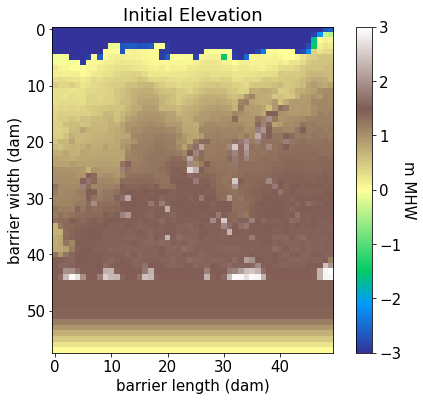

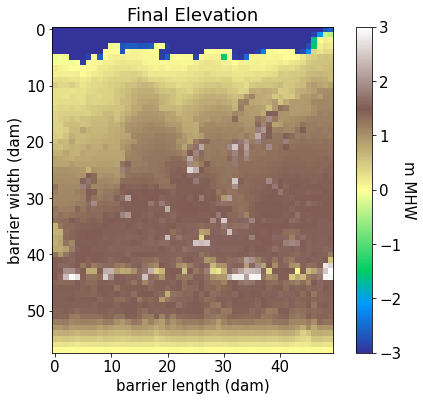

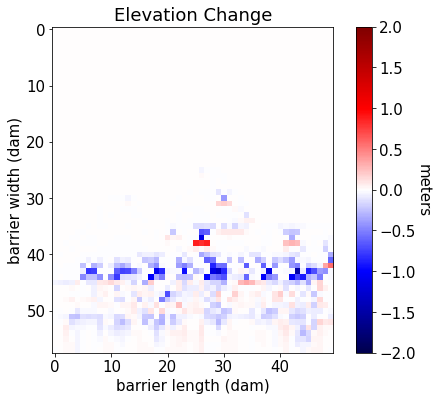

In [4]:
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams.update({"font.size": 15})

initial_domain = cascade.outwash[0]._initial_full_domain
final_domain = cascade.outwash[0]._full_domain
domain_change = final_domain-initial_domain

### ELEVATION PLOTS-------------------------------------------------------------------------------------------------------------
# plotting initial domain
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
mat = ax1.matshow(
    initial_domain*10,
    cmap="terrain",
    vmin=-3.0, vmax=3.0,
)
cbar = fig1.colorbar(mat)
cbar.set_label('m MHW', rotation=270, labelpad=15)
ax1.set_title("Initial Elevation")
ax1.set_ylabel("barrier width (dam)")
ax1.set_xlabel("barrier length (dam)")
plt.gca().xaxis.tick_bottom()

# plotting post storm elevation
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
mat2 = ax2.matshow(
    final_domain[:, :]*10,
    cmap="terrain",
    vmin=-3.0, vmax=3.0,
)
ax2.set_xlabel('barrier length (dam)')
ax2.set_ylabel('barrier width (dam)')
ax2.set_title("Final Elevation")
plt.gca().xaxis.tick_bottom()
cbar = fig2.colorbar(mat2)
cbar.set_label('m MHW', rotation=270, labelpad=15)

# plotting domain elevation change
domain_change = final_domain - initial_domain
fig3 = plt.figure()
ax3 = fig3.add_subplot(111)
mat3 = ax3.matshow(
    domain_change*10,
    cmap="seismic",
    vmin=-2, vmax=2,
)
ax3.set_xlabel('barrier length (dam)')
ax3.set_ylabel('barrier width (dam)')
ax3.set_title("Elevation Change")
plt.gca().xaxis.tick_bottom()
cbar = fig3.colorbar(mat3)
cbar.set_label('meters', rotation=270, labelpad=15)



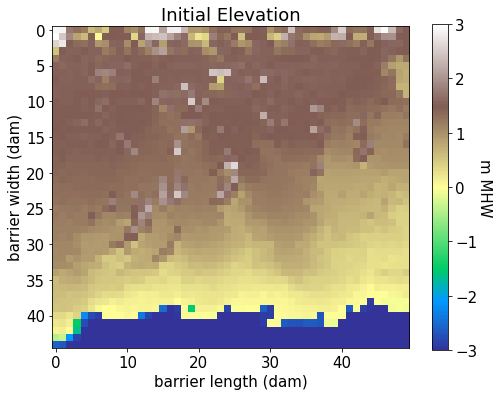

In [5]:
dunes = cascade.barrier3d[0].DuneDomain[cascade.barrier3d[0].time_index - 1]
dunes = np.transpose(dunes) + cascade.barrier3d[0]._BermEl
domain = cascade.barrier3d[0].DomainTS[cascade.barrier3d[0].time_index - 1]
full_domain = np.append(dunes, domain, 0)

### ELEVATION PLOTS-------------------------------------------------------------------------------------------------------------
# plotting initial domain
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
mat = ax1.matshow(
    full_domain*10,
    cmap="terrain",
    vmin=-3.0, vmax=3.0,
)
cbar = fig1.colorbar(mat)
cbar.set_label('m MHW', rotation=270, labelpad=15)
ax1.set_title("Initial Elevation")
ax1.set_ylabel("barrier width (dam)")
ax1.set_xlabel("barrier length (dam)")
plt.gca().xaxis.tick_bottom()

In [6]:
cascade.outwash[0]._Qs_shoreface

array([   0.       ,    0.       ,    0.       ,    0.       ,
          0.       ,    0.       ,    0.       ,    0.       ,
          0.       ,    0.       ,    0.       ,    0.       ,
          0.       ,    0.       ,    0.       ,    0.       ,
          0.       ,    0.       ,    0.       ,    0.       ,
          0.       ,    0.       ,    0.       ,    0.       ,
          0.       , 5881.7488142])

In [7]:
# dunes closest to beach

dune_array2 = np.zeros([cascade.barrier3d[0]._time_index-1, cascade.barrier3d[0]._BarrierLength])
for t in range(1, 43):
    beach_dunes2 = cascade.barrier3d[0].DuneDomain[t]
    beach_dunes2 = np.transpose(beach_dunes2) + cascade.barrier3d[0]._BermEl
    beach_dunes2 = beach_dunes2[0]
    dune_array2[t-1] = beach_dunes2
# print(dune_array)
fig = plt.figure()
ax = fig.add_subplot(111)
mat = ax.matshow(
#     np.flip(full_domain, 0)*10,
    dune_array2*10,
    cmap="terrain",
    vmin=-0.5, vmax=3.0,
)
cbar = fig.colorbar(mat)
cbar.set_label('m MHW', rotation=270, labelpad=15)
ax.set_title("Dune Elevation closest to Ocean")
ax.set_ylabel("time")
ax.set_yticks([0,9,19,29,39,49,59])
labels=['1','10','20','30','40','50','60']
ax.set_yticklabels(labels)
ax.set_xlabel("barrier length (dam)")
# xticklabels({'1, 10, 20, 30, 40, 40, 60'})
plt.gca().xaxis.tick_bottom()

# dunes closest to beach

dune_array2 = np.zeros([cascade.barrier3d[0]._time_index-1, cascade.barrier3d[0]._BarrierLength])
for t in range(1, 43):
    beach_dunes2 = cascade.barrier3d[0].DuneDomain[t]
    beach_dunes2 = np.transpose(beach_dunes2) + cascade.barrier3d[0]._BermEl
    beach_dunes2 = beach_dunes2[1]
    dune_array2[t-1] = beach_dunes2
# print(dune_array)
fig = plt.figure()
ax = fig.add_subplot(111)
mat = ax.matshow(
#     np.flip(full_domain, 0)*10,
    dune_array2*10,
    cmap="terrain",
    vmin=-0.5, vmax=3.0,
)
cbar = fig.colorbar(mat)
cbar.set_label('m MHW', rotation=270, labelpad=15)
ax.set_title("Dune Elevation closest to Bay")
ax.set_ylabel("time")
ax.set_yticks([0,9,19,29,39,49,59])
labels=['1','10','20','30','40','50','60']
ax.set_yticklabels(labels)
ax.set_ylim(bottom=None, top=1)
ax.set_xlabel("barrier length (dam)")
plt.gca().xaxis.tick_bottom()

IndexError: index 26 is out of bounds for axis 0 with size 26